<a href="https://colab.research.google.com/github/ShamsJarrar/Adult-Census-Income-Classfication/blob/main/Adult_Census_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data and Exploring it

In [ ]:
import pandas as pd

data = pd.read_csv('/content/adult.csv')

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
data[['educational-num', 'education']].value_counts()

,,count
educational-num,education,
9,HS-grad,15784
10,Some-college,10878
13,Bachelors,8025
14,Masters,2657
11,Assoc-voc,2061
7,11th,1812
12,Assoc-acdm,1601
6,10th,1389
4,7th-8th,955


In [ ]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [ ]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

Some ambiguities in the columns:
- We notice in workclass there is ? which needs handling.
- fnlwgt is not clear, from research it shows that it means final weight: (an estimate of the number of individuals in the population with the same demographics as this individual). It could be influetial in a sense in classfication, as the more people relating to the same demographic, the less the amount of money distributed to each individual.
- educational-num, is ordinal encoding of education, which means we can drop education. In addition, ordinal encoding is better in this situation, as usually but not always (this is a big generalization), the higher the education of someone, the higher their salary, or if their education is above a certain level, they are more likely to make more money, but this generally represents only the difference for example between high school grad and bachelor grad, I assume the difference in salaries between bachelor, master, and doctorate is not that influential for example, but further data exploration is needed.
- in marital status, there are some categories for Married that were explored for their meaning.
- relationship is not that clear, I think it shows whether the person belongs to a family or not, and some like Own-child could mean they are married or not, but which description takes precendence over the other for the person is not clear.
- capital gain and loss could mean how much a person gains money or loses overall, it could be from selling assets for example, in the context it is not clear whether when collecting the data they were relating it to the salary for example, how much revenue did the person generate in a month or how much money did they lose. I will go witht he second meaning.

In [ ]:
# checking if cols have any null values other than
# ? which I will consider as null for categorical data
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

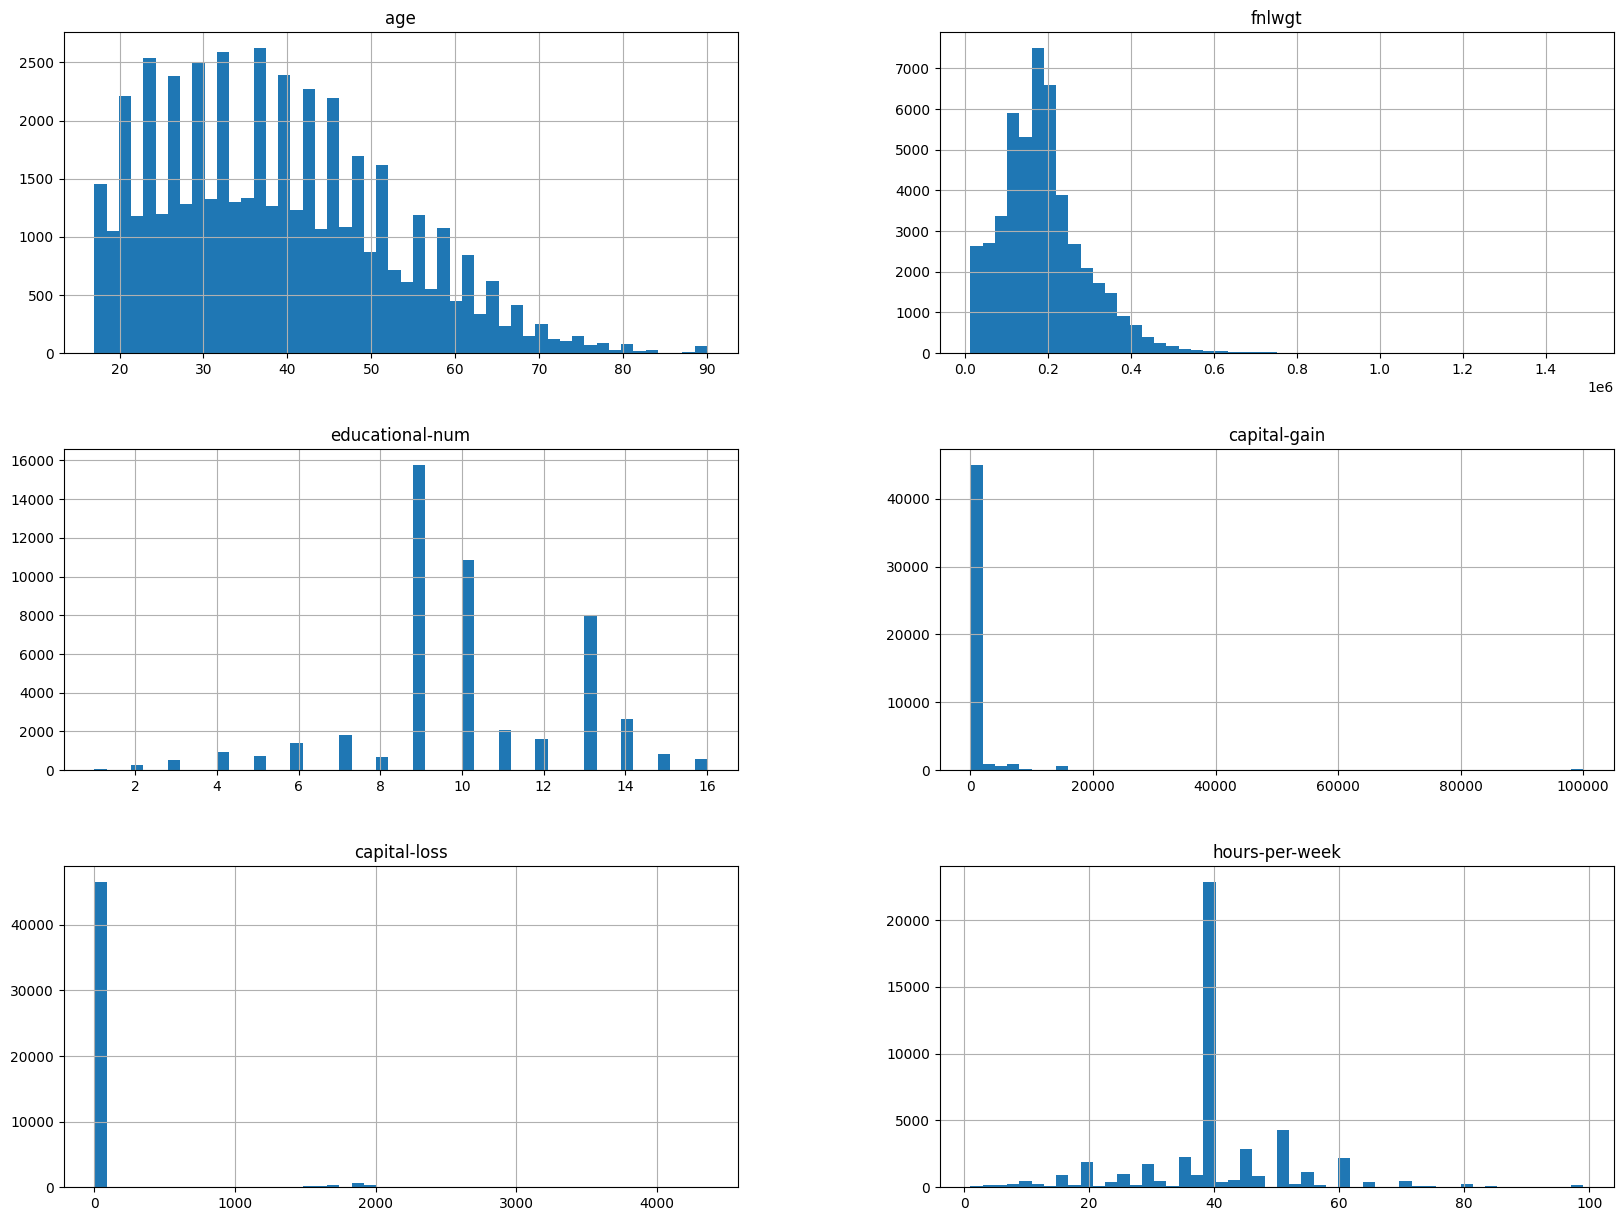

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

In [ ]:
data['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


In [ ]:
data['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [ ]:
data['educational-num'].value_counts()

,count
educational-num,
9,15784
10,10878
13,8025
14,2657
11,2061
7,1812
12,1601
6,1389
4,955


None of the data seems to be normally distributed hence standardization for numerical columns would be the best solution.

Also, the data will be stratified split based on educatioal-num

# Processing and Splitting Data

## One hot encoding data before splitting

One hot encoding data before splitting ensures that all data categories will be included and no missing column will be found in one of the sets.
<br>
It doesn't cause data leakage since it is only categorical
<br>
All categorical data will be one hot encoded, since the data doesn't represent hierarchy or importance over the other to be ordinal encoded
<br>
In addition, education column will be dropped since we have educational-num as its ordinal encoded representation.
<br>
Relationship column will also be dropped since it doesn't add more info than marital status
<br>
Income column will also be ordinal encoded

In [ ]:
data.drop('education', inplace=True, axis = 1)
data.drop('relationship', inplace=True, axis = 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

oneHotEncoder = OneHotEncoder()
ordinalEncoder = OrdinalEncoder()

income_encoded = OrdinalEncoder().fit_transform(data[['income']])
data['income'] = income_encoded
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0.0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0.0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1.0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1.0
4,18,?,103497,10,Never-married,?,White,Female,0,0,30,United-States,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,0.0
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,1.0
48839,58,Private,151910,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,0.0
48840,22,Private,201490,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,0.0


This is my second time doing this data processing because when I split the data, and wanted to calculate the score of one of the models, I got an error saying that there is a missing column, which was because I one hot encoded after splitting.

<br>

The first I did create a function to replace '?' in categorical columns with the most frequent, as I treated it as missing data, but If I do this before splitting, it might lead to data leakage or maybe wrong estimation as it would get the most frequent according to this entire data set.
Hence, I will keep ? as they are and to be treated as unknown situation.

In [ ]:
cat_cols = []
for col in data.columns:
  if (col != 'income') and (data[col].dtype == 'object'):
    cat_cols.append(col)

cat_cols

['workclass',
 'marital-status',
 'occupation',
 'race',
 'gender',
 'native-country']

In [ ]:
oneHotEncoder = OneHotEncoder(sparse_output=False)
encoded_cols = oneHotEncoder.fit_transform(data[cat_cols])

In [ ]:
cat_df = pd.DataFrame(encoded_cols, columns=oneHotEncoder.get_feature_names_out(cat_cols))
cat_df

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
encoded_data = pd.concat([data, cat_df], axis = 1)
encoded_data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,Private,226802,7,Never-married,Machine-op-inspct,Black,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,White,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,?,103497,10,Never-married,?,White,Female,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,White,Female,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,58,Private,151910,9,Widowed,Adm-clerical,White,Female,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,22,Private,201490,9,Never-married,Adm-clerical,White,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
encoded_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
educational-num,0
marital-status,0
...,...
native-country_Thailand,0
native-country_Trinadad&Tobago,0
native-country_United-States,0
native-country_Vietnam,0


In [ ]:
encoded_data.drop(cat_cols, inplace=True, axis = 1)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 87 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48842 non-null  int64  
 1   fnlwgt                                     48842 non-null  int64  
 2   educational-num                            48842 non-null  int64  
 3   capital-gain                               48842 non-null  int64  
 4   capital-loss                               48842 non-null  int64  
 5   hours-per-week                             48842 non-null  int64  
 6   income                                     48842 non-null  float64
 7   workclass_?                                48842 non-null  float64
 8   workclass_Federal-gov                      48842 non-null  float64
 9   workclass_Local-gov                        48842 non-null  float64
 10  workclass_Never-worked

## Splitting the data

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# I will split based on educational num, to ensure representation of all

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.15, random_state = 42)
for train_index, test_index in split.split(encoded_data, encoded_data['educational-num']):
  train = encoded_data.loc[train_index]
  test = encoded_data.loc[test_index]

In [ ]:
train['educational-num'].value_counts()/ len(train)

,count
educational-num,
9,0.323160
10,0.222715
13,0.164302
14,0.054390
11,0.042202
7,0.037095
12,0.032783
6,0.028448
4,0.019559


In [ ]:
test['educational-num'].value_counts()/ len(test)

,count
educational-num,
9,0.323188
10,0.222738
13,0.164324
14,0.054456
11,0.042173
7,0.037123
12,0.032756
6,0.028388
4,0.019517


In [ ]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
# splitting training set into train and validation set
# since we want 15% of the original set to be validation
# and our current training set is 85% of the original
# 15%/85% = 0.176

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.176, random_state = 42)
for train_index, val_index in split.split(train, train['educational-num']):
  train_split = train.loc[train_index]
  val = train.loc[val_index]

In [ ]:
train_split.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

In [ ]:
train_split['educational-num'].value_counts()/ len(train_split)

,count
educational-num,
9,0.323170
10,0.222726
13,0.164289
14,0.054373
11,0.042212
7,0.037097
12,0.032770
6,0.028444
4,0.019557


In [ ]:
val['educational-num'].value_counts()/ len(val)

,count
educational-num,
9,0.323115
10,0.222663
13,0.164363
14,0.054468
11,0.042151
7,0.037088
12,0.032845
6,0.028466
4,0.019570


In [ ]:
# Creating X and y for each set

X_train = train_split.drop('income', axis=1)
y_train = train_split['income'].copy()

X_val = val.drop('income', axis=1)
y_val = val['income'].copy()

X_test = test.drop('income', axis=1)
y_test = test['income'].copy()

In [ ]:
X_train.shape

(34208, 86)

## Preparing data pipeline for scaling numerical values

As mentioned before, standardization will be used since data is not normally distributes

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

cat_cols = []
for col in X_train.columns:
  if col not in num_cols:
    cat_cols.append(col)

num_pipeline = ColumnTransformer([
    ('std_scaler', StandardScaler(), num_cols),
    ('cat_cols', 'passthrough', cat_cols)
])

scaled_Xtrain = num_pipeline.fit_transform(X_train)
scaled_Xval = num_pipeline.fit_transform(X_val)
scaled_Xtest = num_pipeline.fit_transform(X_test)

In [ ]:
scaled_Xtrain

array([[ 0.54023454,  4.82964829, -0.14309158, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54023454, -1.25090306, -0.14309158, ...,  1.        ,
         0.        ,  0.        ],
       [-0.84890763,  2.1106351 , -0.14309158, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.26400566, -0.74099986, -0.14309158, ...,  1.        ,
         0.        ,  0.        ],
       [-0.33711841, -1.30233406, -0.14309158, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04466742, -0.94677153, -0.14309158, ...,  1.        ,
         0.        ,  0.        ]])

# Machine Learning Algorithms

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(scaled_Xtrain, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Checking model's accuracy
log_reg.score(scaled_Xtrain, y_train)

0.8527537418147801

In [ ]:
log_reg.score(scaled_Xval, y_val)

0.8542493499384152

the model seems to perform well on unseen data.
To increase accuracy, hyperparameter tuning will be used

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'penalty' : ['l1', 'l2'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [100, 175, 200, 300]
}

# penalty would ensure regularization
# Finding the best solver is integral for optimization
# max_iter would also limit overfitting

log_reg = LogisticRegression()
rand_search = RandomizedSearchCV(log_reg, param, cv=5, n_iter = 10, scoring='accuracy')
rand_search.fit(scaled_Xtrain, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 175, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
rand_search.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 175}

In [ ]:
log_reg = LogisticRegression(max_iter=175, penalty='l2', solver='lbfgs')
log_reg.fit(scaled_Xtrain, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=175)

In [ ]:
log_reg.score(scaled_Xval, y_val)

0.854523060079376

Accuracy decreased slightly

### Evaluation

Our model is accuracy based, but I will also evaluate using other metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

predictions = log_reg.predict(scaled_Xtest)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8509621946226287

the value shows that the model is not overfitting, and does as well on unseen data (low bias, low variance)

In [ ]:
precision = precision_score(y_test, predictions, average='weighted')
precision

0.844188497304883

In [ ]:
recall = recall_score(y_test, predictions, average='weighted')
recall

0.8509621946226287

In [ ]:
f1_score = f1_score(y_test, predictions, average='weighted')
f1_score

0.844773228044291

In [ ]:
prob = log_reg.predict_proba(scaled_Xtest)
prob

array([[0.66013392, 0.33986608],
       [0.98167796, 0.01832204],
       [0.60004641, 0.39995359],
       ...,
       [0.98118721, 0.01881279],
       [0.99057692, 0.00942308],
       [0.32904472, 0.67095528]])

In [ ]:
prob[:, 0]

array([0.66013392, 0.98167796, 0.60004641, ..., 0.98118721, 0.99057692,
       0.32904472])

In [ ]:
false_p, true_p, threshold = roc_curve(y_test, prob[:, 1])

In [ ]:
from sklearn.metrics import auc
auc_roc = auc(false_p, true_p)

In [ ]:
auc_roc

0.901730022408731

The auc value is close to one which means model makes correct predictions most of the time

Text(0, 0.5, 'True Positive Rate')

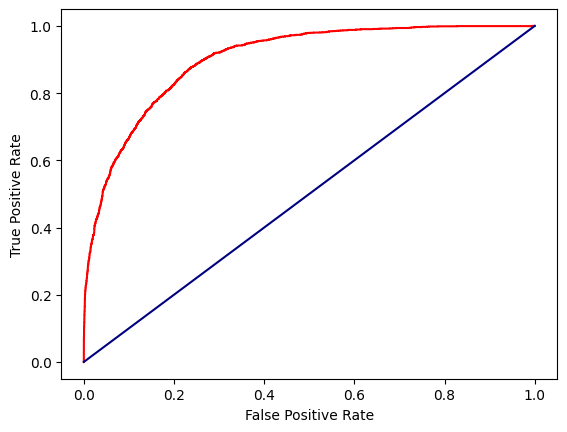

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(false_p, true_p, color='red')
plt.plot([0, 1], [0, 1], color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RNDF = RandomForestClassifier()
RNDF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RNDF.score(X_train, y_train)

0.9998830682881198

In [ ]:
RNDF.score(X_val, y_val)

0.851922813740249

The model does well generally, but it might be overfitting

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators' : [100, 200, 300, 400],
    'max_depth' : [10, 30, 50, 100, 115],
    'min_samples_split' : [2, 5, 15, 20],
    'max_features' : ['sqrt', 'log2'],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

RNDF = RandomForestClassifier()

rand_search = RandomizedSearchCV(RNDF, param, cv=5, n_iter = 10, scoring='accuracy')
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 30, 50, 100, 115],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 15, 20],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy')

In [ ]:
rand_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 20,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy'}

In [ ]:
RNDF = RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2', min_samples_split=20, n_estimators=400)
RNDF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       min_samples_split=20, n_estimators=400)

In [ ]:
RNDF.score(X_val, y_val)

0.8642397700834816

Accuracy definitely improved after hyperparameter tuning

### Evaluation

As mentined previously, our model is accuracy based, but it will also be evaluated on other metrics to be able to compare to other models.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

predictions = RNDF.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8644738637914563

The model has consistent accuracy on unseen data

In [ ]:
precision = precision_score(y_test, predictions, average='weighted')
precision

0.8592811444252048

In [ ]:
recall = recall_score(y_test, predictions, average='weighted')
recall

0.8644738637914563

In [ ]:
f1_score = f1_score(y_test, predictions, average ='weighted')
f1_score

0.8569733172251167

In [ ]:
prob = RNDF.predict_proba(X_test)
prob

array([[8.90915290e-01, 1.09084710e-01],
       [9.66664932e-01, 3.33350675e-02],
       [5.73439956e-01, 4.26560044e-01],
       ...,
       [9.95969995e-01, 4.03000547e-03],
       [9.99254230e-01, 7.45769930e-04],
       [5.22440064e-01, 4.77559936e-01]])

In [ ]:
false_p, true_p, threshold = roc_curve(y_test, prob[:, 1])
auc_roc = auc(false_p, true_p)

In [ ]:
auc_roc

0.9166727206055323

the auc value is very close to one, which means the model is doing well

Text(0, 0.5, 'True Positive Rate')

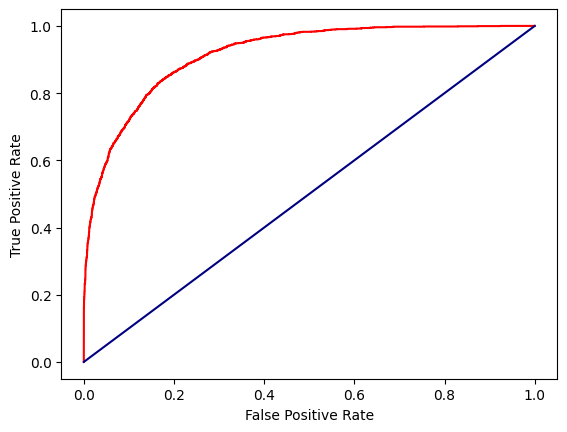

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(false_p, true_p, color='red')
plt.plot([0, 1], [0, 1], color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Neural Network

## Model 1

The first model I am going to try is going to have pyramid shaped hidden layers

In [ ]:
scaled_Xtrain.shape[1]

86

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(64, activation = 'relu', input_dim=scaled_Xtrain.shape[1]))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           5,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,321 (32.50 KB)

 Trainable params: 8,321 (32.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
model1.fit(scaled_Xtrain, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8262 - loss: 0.3726
Epoch 2/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8522 - loss: 0.3108
Epoch 3/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8565 - loss: 0.3085
Epoch 4/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8546 - loss: 0.3063
Epoch 5/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8588 - loss: 0.2981
Epoch 6/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8557 - loss: 0.3041
Epoch 7/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8603 - loss: 0.2982
Epoch 8/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8614 - loss: 0.2980
Epoch 9/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8627 - loss: 0.2928
Epoch 10/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8544 - loss: 0.2991
Epoch 11/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8658 - loss: 0.2879
Epoch 12/100
1069/1

In [ ]:
predictions = model1.predict(scaled_Xval)

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
predictions

array([[2.3655043e-14],
       [8.7442217e-13],
       [4.1405398e-02],
       ...,
       [1.0000000e+00],
       [8.8989985e-01],
       [6.7875993e-01]], dtype=float32)

In [ ]:
predictions = [0 if y < 0.5 else 1 for y in predictions]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, predictions)

0.8487751471192008

Accuracy is fairly good

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

precision = precision_score(y_val, predictions, average = 'weighted')
precision

0.8452993317130135

In [ ]:
recall = recall_score(y_val, predictions, average = 'weighted')
recall

0.8487751471192008

In [ ]:
f1 = f1_score(y_val, predictions, average = 'weighted')
f1

0.8466802561247023

In [ ]:
false_p, true_p, threshold = roc_curve(y_val, predictions)
auc_roc = auc(false_p, true_p)

<function sklearn.metrics._ranking.auc(x, y)>

In [ ]:
auc_roc

0.7806973977369974

the auc value is good, close to 1, but not as good as the result we got in machine learning

Text(0, 0.5, 'True Positive Rate')

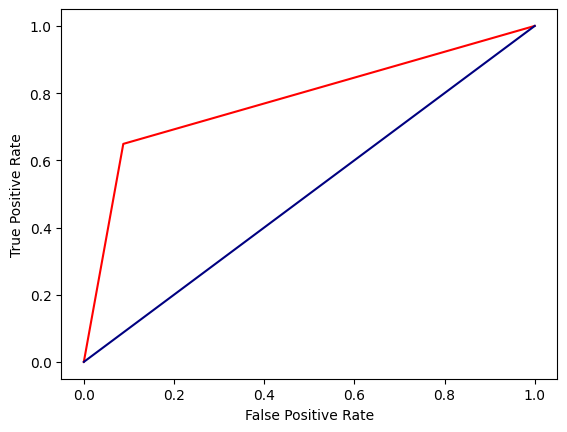

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(false_p, true_p, color='red')
plt.plot([0, 1], [0, 1], color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Model 2

For this model, I will try to make all layers have the same size, and in the same time increase the number of epochs

In [ ]:
model2 = Sequential()
model2.add(Dense(64, activation = 'relu', input_dim=scaled_Xtrain.shape[1]))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'sigmoid'))
model2.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │           5,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,113 (70.75 KB)

 Trainable params: 18,113 (70.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
history = model2.fit(scaled_Xtrain, y_train, epochs= 200, batch_size= 32)

Epoch 1/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8264 - loss: 0.3792
Epoch 2/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8554 - loss: 0.3136
Epoch 3/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8566 - loss: 0.3042
Epoch 4/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8581 - loss: 0.3009
Epoch 5/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8606 - loss: 0.2993
Epoch 6/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8591 - loss: 0.2971
Epoch 7/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8635 - loss: 0.2918
Epoch 8/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8625 - loss: 0.2942
Epoch 9/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8662 - loss: 0.2879
Epoch 10/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8658 - loss: 0.2850
Epoch 11/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8662 - loss: 0.2863
Epoch 12/200
1069/1

In [ ]:
predictions = model2.predict(scaled_Xval)
predictions = [0 if y < 0.5 else 1 for y in predictions]

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
accuracy = accuracy_score(y_val, predictions)
accuracy

0.8271520459833037

Accuracy for this model is worse, hence I will build on the previous model

In [ ]:
precision = precision_score(y_val, predictions, average = 'weighted')
precision

0.8279983463007501

In [ ]:
recall = recall_score(y_val, predictions, average = 'weighted')
recall

0.8271520459833037

In [ ]:
f1 = f1_score(y_val, predictions, average = 'weighted')
f1

0.8275640622331166

In [ ]:
false_p, true_p, threshold = roc_curve(y_val, predictions)
auc_roc = auc(false_p, true_p)
auc_roc

0.76663293275721

## Model 3

I will try increasing the number of layers by 1 and increase the number of epochs

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(64, activation = 'relu', input_dim=scaled_Xtrain.shape[1]))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(4, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 64)                  │           5,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,353 (32.63 KB)

 Trainable params: 8,353 (32.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
history = model1.fit(scaled_Xtrain, y_train, epochs = 200, batch_size=32)

Epoch 1/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7686 - loss: 0.6245
Epoch 2/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8530 - loss: 0.4333
Epoch 3/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8543 - loss: 0.3698
Epoch 4/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8561 - loss: 0.3440
Epoch 5/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8577 - loss: 0.3282
Epoch 6/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8598 - loss: 0.3168
Epoch 7/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8582 - loss: 0.3147
Epoch 8/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8586 - loss: 0.3126
Epoch 9/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8603 - loss: 0.3088
Epoch 10/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8610 - loss: 0.3024
Epoch 11/200
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8625 - loss: 0.2959
Epoch 12/200
1069/1

Text(0, 0.5, 'Loss')

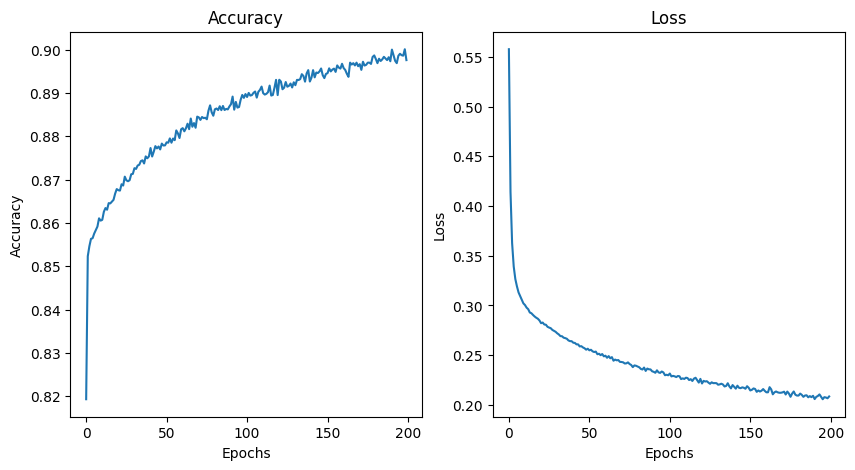

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

it shows that with the more epochs it kept on going up and down at the end.

In [ ]:
predictions = model1.predict(scaled_Xval)
predictions = [0 if y < 0.5 else 1 for y in predictions]

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
accuracy = accuracy_score(y_val, predictions)
accuracy

0.8452169152867114

This accuracy is actually less than the original model's accuracy, it might be because of the increased number of epochs

## Evaluation Model 1 on test set

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(64, activation = 'relu', input_dim=scaled_Xtrain.shape[1]))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
model1.fit(scaled_Xtrain, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7842 - loss: 0.4158
Epoch 2/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8521 - loss: 0.3152
Epoch 3/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8557 - loss: 0.3093
Epoch 4/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8562 - loss: 0.3077
Epoch 5/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8574 - loss: 0.3039
Epoch 6/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8628 - loss: 0.2960
Epoch 7/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8667 - loss: 0.2940
Epoch 8/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8585 - loss: 0.2999
Epoch 9/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8623 - loss: 0.2961
Epoch 10/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8617 - loss: 0.2949
Epoch 11/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8635 - loss: 0.2908
Epoch 12/100
1069/1

In [ ]:
predictions = model1.predict(scaled_Xtest)
predictions = [0 if y < 0.5 else 1 for y in predictions]

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8371775624402893

In [ ]:
precision = precision_score(y_test, predictions, average = 'weighted')
precision

0.839724812954965

In [ ]:
recall = recall_score(y_test, predictions, average = 'weighted')
recall

0.8371775624402893

In [ ]:
f1 = f1_score(y_test, predictions, average = 'weighted')
f1

0.8383448302400897

In [ ]:
false_p, true_p, threshold = roc_curve(y_test, predictions)
auc_roc = auc(false_p, true_p)
auc_roc

0.7850799811808986

## Keras - Tuner

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

<ipython-input-156-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def create_model(hp):
  model = Sequential()

  # Tuning the number of layers and the number of units
  for i in range(hp.Int('num_layers', 3, 8)):
    if i == 0:
      model.add(Dense(units = hp.Int(f'units_{i}', min_value = 8, max_value = 512, step = 16), activation = 'relu', input_dim = scaled_Xtrain.shape[1]))
    else:
      model.add(Dense(units = hp.Int(f'units_{i}', min_value = 8, max_value = 512, step = 16), activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid'))

  # tuning learning rate for optimizer
  l_rate = hp.Choice('learning_rate', values = [0.0001, 0.001, 0.1])
  model.compile(loss ='binary_crossentropy', metrics = ['accuracy'], optimizer = keras.optimizers.Adam(learning_rate = l_rate))

  return model

In [ ]:
from tensorflow import keras
tune = kt.RandomSearch(
    create_model,
    objective = 'val_accuracy',
    max_trials = 8,
    executions_per_trial = 2,
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tune.search(scaled_Xtrain, y_train,
            validation_data = (scaled_Xval, y_val),
            epochs = kt.HyperParameters().Int('epochs', min_value = 50, max_value = 100, step = 10),
            batch_size = kt.HyperParameters().Choice('batch_size', [8, 16, 32, 64]))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
4                 |4                 |num_layers
184               |184               |units_0
360               |360               |units_1
280               |280               |units_2
0.001             |0.001             |learning_rate

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4276/4276 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8259 - loss: 0.3614 - val_accuracy: 0.8577 - val_loss: 0.3249
Epoch 2/50
4276/4276 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8543 - loss: 0.3122 - val_accuracy: 0.8588 - val_loss: 0.3167
Epoch 3/50
4276/4276 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8596 - loss: 0.3064 - val_accuracy: 0.8612 - val_loss: 0.3107
Epoch 4/50
4276/4276 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8619 - loss: 0.3015 - val_accuracy: 0.8495 - val_loss: 0.3305
Epoch 5/50
4276/4276 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.8613 - loss: 0.2990 - val_accuracy: 0.8651 - val_loss: 0.3098
Epoch 6/50
4276/4276 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8594 - loss: 0.2993 - val_accuracy: 0.8566 - val_loss: 0.3249
Epoch 7/50
4276/4276 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8659 - loss: 0.2896 - val_accuracy: 0.8629 - val_loss: 0.3111
Epoch 8/50
4276/4276 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8640 - loss: 0.2902 - val

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4276/4276 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8322 - loss: 0.3577 - val_accuracy: 0.8516 - val_loss: 0.3160
Epoch 2/50
2724/4276 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8519 - loss: 0.3167

KeyboardInterrupt: 

Unfortunately, it is takikng too long to excute, and sadly I don't have the advantage of time, hence I stopped it.
<br>
It can be seen though that validation accuracy was higher than the accuracy we got before tuning in some epochs.

# Conclusion and Comparison

**Comparing Neural Network Models**

3 models were created, a model that uses pyramid shape layers, a model that has the same number of neurons in each layer (with more training epochs and a mix of activation functions), and a model that adds on model1 an additional layer and more epochs.

<br>

The model that performed that performed the best out of them all if the 1st model and it will be used for comparison with the machine learning models.

<br>

Keras tuner was used, but due to the long running time, it had to be stopped, but from the overall look on the val_accuracy in the epochs, it looked like it was doing better than model1

<br>
<br>

**Comparing NN with Machine Learning Models**

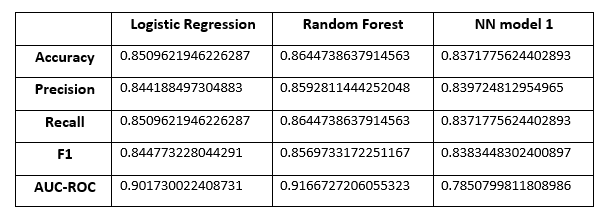

It can be seen that the model that performed the best is Random Forest. It has higher accuracy, and does better overall on all metrics. It's AUC-ROC value is very close to 1, showing that it gets the prediction right most of the time.

<br>

Logistic Regression's performance is very close to Random's forest.
Both Logistic Regression's and Random Forest's performances improved after hyperparameter tuning.

<br>

The neural network has also good accuracy, but it's AUC-ROC is bad compared to the other models, although it is also very close to 1.
Training the NN took longer, and trying to tune its parameters took much longer than the machine learning model.

<br>

For such problems that can be solved with high accuracy with ML models, it is better to use ML models over NNs, as to reach the desired results in NNs might take too long and require alot of work compared ML.
In addition, it is easier to understand what to fix if the model failed in a certain case in ML than in NNs.

<br>

My NN model maybe needs to simplified if it was overfitting because of it's high complexity, and maybe it needs to be more complex, although when that was tried it didn't perform better.